# **Best Seller Tattoo products in Amazon (Nov 2023), $200 and above** 

## ETL and Data Analysis with SQL and Python

The criteria for selecting the best products only include products with a price greater than $200.

### **I. EXTRACT: Retrieve the data from Amazon using a Python webscraper**

I tried first doing this directly in Jupyter Notebooks but there were too many errors:

    A Scrapy 503 Service Unavailable Error is logged when the backend server your spider is trying to connect to returns a 503 HTTP   
    status code. Meaning the server is currently unable to handle incoming requests. Either because the server is down for maintenance   
    or is too overloaded with incoming requests and can't handle anymore. However, oftentimes when your spider gets this error you can   
    connect to the target website normally with your browser. This means that the server is likely returning the 503 HTTP status code on   
    purpose to your scraper. Most likely because the server believes you are a scraper and is blocking you.

The solution to the error was to create the webscraper directly in my computer downloading the HTML code for each page we are webscraping.   

The columns and information we want from each product is: 

    - 'link': with the image of the product
    - 'title': with the product as described in Amazon
    - 'rating' 
    - 'price'
    - 'prime_price': with the price for Amazon prime members
    - 'num_of_ratings': with the number of ratings


#### **1. Run this code for each page that we scrape, this will give us a json file for each page**

### **II. TRANSFORM:** 

#### **1. Cleanse the data to improve quality and establish consistency**

    - Combine each Json file extracted from each page
    - Modify the 'price' and 'prime_price' columns to remove the '$' and ',' signs
    - Append the modified data into a single csv file

#### **2. Combine image files gathered from each page into a single destination**

#### **3. Add a new permanent column 'product_type' and organize according to type**

**SQL Query:**

**Python:**

In [76]:
import pandas as pd

# Read the combined CSV file into a DataFrame
combined_csv_path = "C:/Users/User/Documents/DataAnalyst/Webscrape/SQL/products_data.csv"
tattoo_data = pd.read_csv(combined_csv_path)

# Define a function to categorize product types based on 'title'
def categorize_product(title):
    title = title.lower()
    if 'machine' in title:
        if 'kit' in title:
            if 'makeup' in title:
                return 'Makeup Kit'
            else:
                return 'Tattoo Machine Kit'
        if 'printer' in title:
            return 'Printer'
        if 'pen' in title:
            return 'Pen Machine'
        else:
            return 'Tattoo Machine'
    elif 'pen' in title:
        if 'kit' in title:
            return 'Pen Kit'
        else:
            return 'Pen Machine'
    elif 'arm rest' in title:
        return 'Arm Rest'
    elif 'printer' in title:
        return 'Printer'
    elif 'makeup' in title:
        return 'Makeup Kit'
    else:
        return 'Other'


# Apply the categorization function to create a new 'product_type' column
tattoo_data['product_type'] = tattoo_data['title'].apply(categorize_product)

# Save the updated DataFrame back to the CSV file
tattoo_data.to_csv("C:/Users/User/Documents/DataAnalyst/Webscrape/SQL/products_data.csv", index=False)

### **III. LOAD:** 

Load Amazon Best seller Tattoo Products data ready for analysis and machine learning. 

In [77]:
tattoo_data

,link,title,rating,price,prime_price,num_of_ratings,product_type
0,./Index_files/71Ioct4CuqL._AC_UL320_.jpg,Ambition Soldier Wireless Tattoo Machine Kit C...,4.6 out of 5 stars,249.99,224.99,176,Tattoo Machine Kit
1,./Index_files/718vZwUgrwL._AC_UL320_.jpg,Mast Tattoo Wireless Tattoo Kit Fold Pro Tatto...,4.2 out of 5 stars,285.99,243.09,134,Tattoo Machine Kit
2,./Index_files/71IxX6UrmFL._AC_UL320_.jpg,"Mast Tattoo Pro Kit, The Fold2 Wireless Tattoo...",4.5 out of 5 stars,219.99,175.99,11,Tattoo Machine Kit
3,./Index_files/51ugJarFQlL._AC_UL320_.jpg,Ambition Soldier Rotary Battery Pen with Extra...,4.6 out of 5 stars,219.99,186.99,918,Pen Machine
4,./Index_files/41mkDNmdshL._AC_UL320_.jpg,Mast Racer Tattoo Pen Machine Wireless Battery...,4.3 out of 5 stars,289.00,231.20,21,Pen Machine
...,...,...,...,...,...,...,...
109,./page3_files/71tWbu22FvL._AC_UL320_.jpg,Complete Scalp Micropigmentation kit by DermMicro,4.0 out of 5 stars,459.99,NaN,43,Other
110,./page3_files/61ggOD8LG+L._AC_UL320_.jpg,Madluvv Deluxe Ink Set - 10 Colors + Shading S...,4.2 out of 5 stars,259.95,NaN,461,Other
111,./page3_files/31hbHPoPW7L._AC_UL320_.jpg,Perma Blend Permanent Makeup Ink Pigments for ...,5.0 out of 5 stars,240.00,NaN,1,Makeup Kit
112,./page3_files/71zL7JT+rKL._AC_UL320_.jpg,Pro Machine Kit - Jconly SOLAR Machine with Wi...,4.7 out of 5 stars,229.99,NaN,7,Tattoo Machine Kit


### **IV. Data analysis: Queries using SQL, Python, and Matplotlib/Seaborn Visualizations**

#### **1. Highest-rated products (5 of 5 stars) ordered by number of ratings**

**SQL Query:**

- Filters for rows where the rating matches the maximum rating in the 'best_sellers' table.
- Orders the results by the number of ratings in descending order.

SELECT title, rating, price, prime_price, num_of_ratings, product_type     
FROM best_sellers    
WHERE rating = (  

    SELECT MAX(rating) FROM best_sellers    
)    
ORDER BY price DESC;

**Python Query:**

In [43]:
import pandas as pd

# Apply the categorization function to create a new 'product_type' column
tattoo_data['product_type'] = tattoo_data['title'].apply(categorize_product)

# Find the maximum rating in the DataFrame
max_rating = tattoo_data['rating'].max()

# Filter for rows with the maximum rating
highest_rated_products = tattoo_data[tattoo_data['rating'] == max_rating]

# Sort the filtered DataFrame by price in descending order
highest_rated_products = highest_rated_products.sort_values(by='num_of_ratings', ascending=False)

# Drop the 'link' column from the DataFrame
highest_rated_products = highest_rated_products.drop(columns=['link'])

# Count the total number of products that meet the specified criteria
total_products = len(highest_rated_products)

print(f"Total number of products: {total_products}")

Total number of products: 42


In [17]:
highest_rated_products

,title,rating,price,prime_price,num_of_ratings,product_type
89,Wireless Machine Pen Kit- Beoncall Rotary 40pc...,5.0 out of 5 stars,209.99,NaN,13,Tattoo Machine Kit
28,Tattoo Kit - Xnet Titan Wireless Tattoo Machin...,5.0 out of 5 stars,223.99,NaN,8,Tattoo Machine Kit
48,Bishop Rotary Shader Wand Pen-Style Rotary Tat...,5.0 out of 5 stars,NaN,NaN,4,Pen Machine
72,Axys Valhalla Rotary Pen Tattoo Machine — Pink,5.0 out of 5 stars,699.99,NaN,3,Pen Machine
104,Thermal Copier Tattoo Stencil Transfer Copier ...,5.0 out of 5 stars,206.76,NaN,3,Printer
62,Peak Solice Modular Pen Tattoo Machine — Black,5.0 out of 5 stars,299.99,NaN,3,Pen Machine
79,Peak Matrix Pen Rotary Tattoo Machine — Silver,5.0 out of 5 stars,239.99,NaN,3,Pen Machine
33,Tattoo Battery Pen Double Lithium Battery Wire...,5.0 out of 5 stars,367.00,NaN,3,Pen Machine
36,FK Irons - EXO Black Ops + 2 PowerBolts 3.2mm ...,5.0 out of 5 stars,974.99,NaN,3,Pen Machine
61,Peak Matrix Pen Rotary Tattoo Machine — Orange,5.0 out of 5 stars,239.99,NaN,2,Pen Machine


**Matplotlib Visualization:**

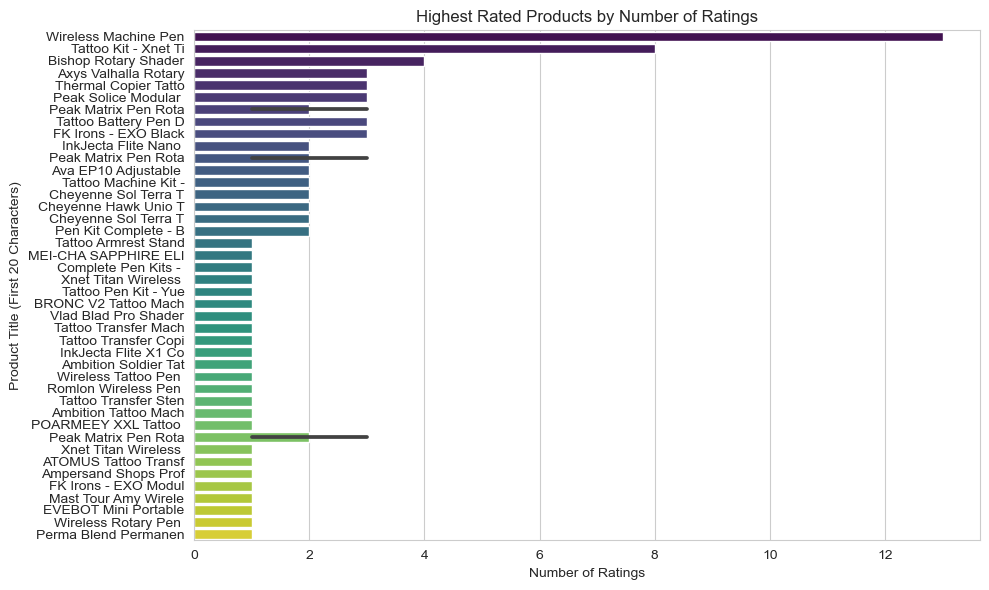

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a horizontal bar plot to visualize the highest-rated products by number of ratings
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Sort the DataFrame by the number of ratings in descending order
highest_rated_products = highest_rated_products.sort_values(by='num_of_ratings', ascending=False)

# Extract the first 20 characters of the 'title' column
short_titles = [title[:20] for title in highest_rated_products['title']]

# Plot the data with short titles on the y-axis
sns.barplot(x='num_of_ratings', y=short_titles, data=highest_rated_products, palette="viridis", orient='h', order=short_titles)

# Customize the plot
plt.title("Highest Rated Products by Number of Ratings")
plt.xlabel("Number of Ratings")
plt.ylabel("Product Title (First 20 Characters)")

# Show the plot
plt.tight_layout()
plt.show()

#### **2. Top Products with biggest savings for Amazon prime members**

**SQL Query:**

**Python Query:**

Product #5
Title: Mast Racer Tattoo Pen Machine Wireless Battery Rotary Tattoo Gun Small for Comfort Control Brushless Motor Power by Mcore QP-033 (Two Batteries, Black)
Price: 289.0
Prime Price: 231.2
Product Type: Pen Machine
Savings: 57.8


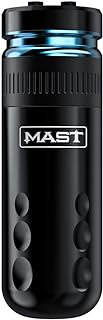

Product #11
Title: Mast Tattoo Flip Pro Wireless & Cord Tattoo Pen Machine Gun 2.6mm-4.0mm Strokes Length Coreless Motor Power by Mcore for Tattoo & SMP
Price: 219.0
Prime Price: 164.25
Product Type: Pen Machine
Savings: 54.75


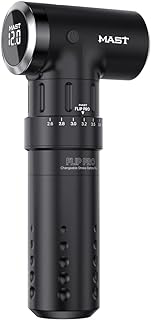

Product #13
Title: Mast Lancer Wireless Rotary Tattoo Pen Machine 2Pcs Replaceable 1900mAh Batteries Digital LED Display Power Supply Q015 (4.2mm Stroke - BK)
Price: 205.99
Prime Price: 154.49
Product Type: Pen Machine
Savings: 51.5


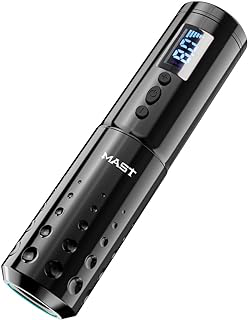

Product #89
Title: Cartridge Machine Kit - Autdor Complete Rotary Cartridge Machine Kit Inlcludes Cartridge Machine Pen 20Pcs Cartridges Power Supply Practice Skin Transfer Paper Accessories
Price: 239.99
Prime Price: 191.99
Product Type: Tattoo Machine Kit
Savings: 48.0


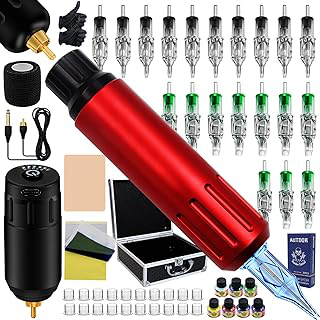

Product #12
Title: HAWINK Wireless Tattoo Machine Rotary Pen Kit Coreless Motor with 900mAh Two Battery 3 Boxes Cartridges 2 Stroke Cam CNC-M-WE-EN05CKIT
Price: 229.99
Prime Price: 183.99
Product Type: Tattoo Machine Kit
Savings: 46.0


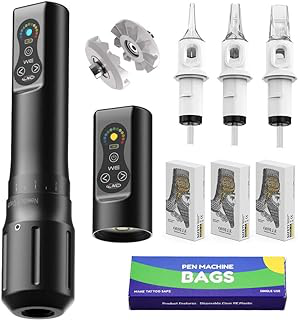

Product #3
Title: Mast Tattoo Pro Kit, The Fold2 Wireless Tattoo Pen Machine Gun Kit, Replaceable 2 Batteries for Running Constantly, Adjust Strokes Length Tattoo Pen Kit, Tattoo Needles Supplies
Price: 219.99
Prime Price: 175.99
Product Type: Tattoo Machine Kit
Savings: 44.0


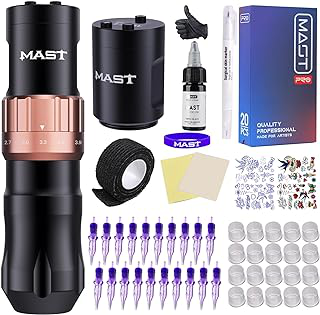

Product #2
Title: Mast Tattoo Wireless Tattoo Kit Fold Pro Tattoo Pen Machine Gun with 2 Batteries Complete Tattoo Kit Needles Cartridges MY032
Price: 285.99
Prime Price: 243.09
Product Type: Tattoo Machine Kit
Savings: 42.9


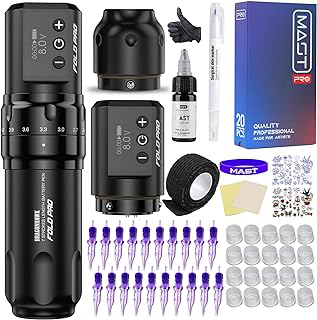

Product #4
Title: Ambition Soldier Rotary Battery Pen with Extra Battery Tattoo Cartridge Machine 2400mAh Wireless Power Japan Coreless Motor Digital LED Display Tattoo Equipment Supply for Professional Tattoo Artists
Price: 219.99
Prime Price: 186.99
Product Type: Pen Machine
Savings: 33.0


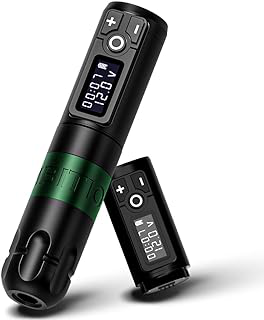

Product #10
Title: Ambition Soldier Tattoo Kit - Wireless Tattoo Machine Kit Complete Rotary Tattoo Machine with Extra 2400mah Power 120pcs Glory Mixed Size Cartridge Needles for Professional Tattoo Artists
Price: 279.99
Prime Price: 251.99
Product Type: Tattoo Machine Kit
Savings: 28.0


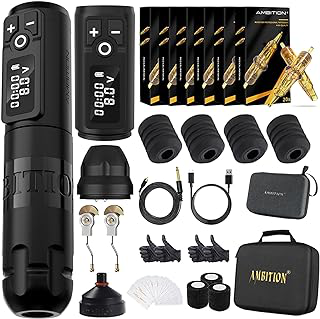

Product #1
Title: Ambition Soldier Wireless Tattoo Machine Kit Complete Rotary Coreless Motor Tattoo Pen Kit with Extra 2400mAh Battery 80pcs Premium Mixed Size Cartridge Needles Supply for Professional Tattoo Artist
Price: 249.99
Prime Price: 224.99
Product Type: Tattoo Machine Kit
Savings: 25.0


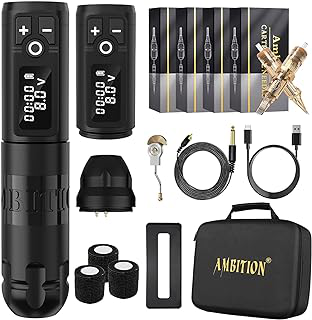

In [18]:
import pandas as pd
from IPython.display import display, HTML
from PIL import Image

# Load data
image_path = "C:/Users/User/Documents/DataAnalyst/Webscrape/CombinedImages/"

# Filter out rows with 'prime_price' as 'null' and create a copy
filtered_data = tattoo_data.dropna(subset=['prime_price']).copy()

# Calculate the price difference and select specific columns
filtered_data['savings'] = filtered_data['price'] - filtered_data['prime_price']

# Select the desired columns
result = filtered_data[['link','title', 'price', 'prime_price', 'savings', 'product_type']]

# Sort the DataFrame by the savings in descending order
sorted_result = result.sort_values(by='savings', ascending=False)

# Display the sorted DataFrame with images
for idx, row in sorted_result.iterrows():
    print(f"Product #{idx + 1}")
    print(f"Title: {row['title']}")
    print(f"Price: {row['price']}")
    print(f"Prime Price: {row['prime_price']}")
    print(f"Product Type: {row['product_type']}")
    print(f"Savings: {round(row['savings'], 2)}")  # Limit to 2 decimal places

    # Load and display the image
    img_path = f"{image_path}{row['link'].split('/')[-1]}"
    display(Image.open(img_path))

    print("=" * 30)

**Matplotlib Visualization:**

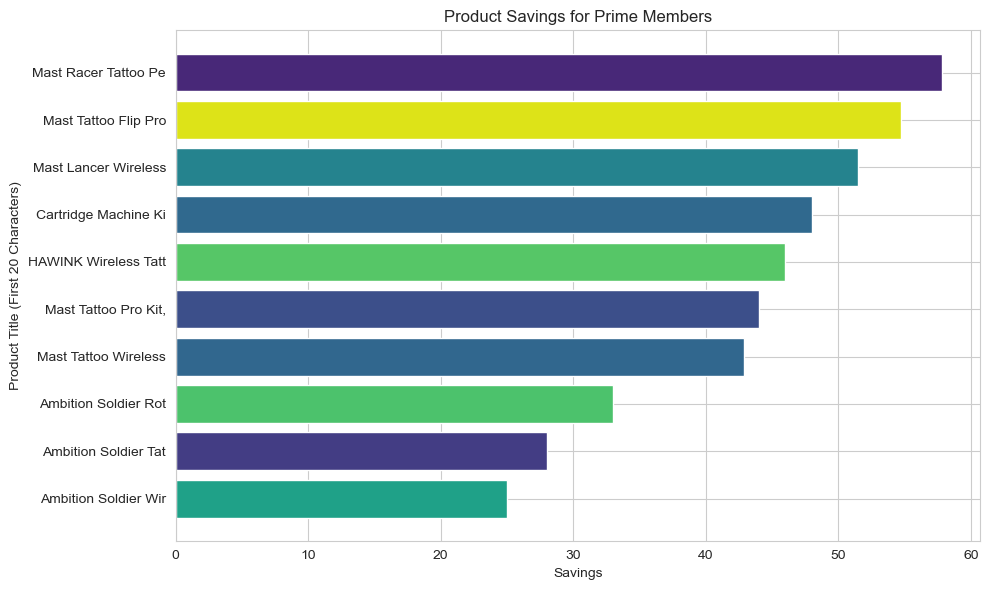

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Sort the DataFrame by savings in descending order
sorted_result = sorted_result.sort_values(by='savings', ascending=True)

# Create a bar plot to visualize the savings with multiple random colors
plt.figure(figsize=(10, 6))

# Extract the first 20 characters of the 'title' column
short_titles = [title[:20] for title in sorted_result['title']]
savings = sorted_result['savings']

# Define a list of random colors for each bar
colors = [plt.cm.viridis(random.random()) for _ in range(len(savings))]

bars = plt.barh(short_titles, savings, color=colors)

# Customize the plot
plt.title("Product Savings for Prime Members")
plt.xlabel("Savings")
plt.ylabel("Product Title (First 20 Characters)")

# Show the plot
plt.tight_layout()
plt.show()

**Conclusion:**

From the results obtained for the query focusing on the top products with the biggest savings for Amazon Prime members, several conclusions can be drawn:

- **Prominence of Pen Machine Products:** Pen Machine products dominate the list of products with significant savings for Amazon Prime members. A   
majority of the products (e.g., Mast Racer Tattoo Pen Machine, Mast Tattoo Flip Pro Wireless, Mast Lancer Wireless Rotary Tattoo Pen Machine) belong   
to the Pen Machine category. This suggests that there might be substantial discounts or savings available specifically for pen-style tattoo machines.

- **Variation in Savings:** The savings vary among the listed products, ranging from around $25.0 to $57.8. While some products offer larger savings,   
others have relatively smaller discounts. This variance might be due to factors like original product prices, current discounts applied by Amazon, or   
specific promotional offers for Prime members.

- **Presence of Tattoo Machine Kits:** Alongside Pen Machines, Tattoo Machine Kits also feature in the list, such as the Cartridge Machine Kit and     
various Mast Tattoo Pro Kits. These kits often include tattoo machine pens, cartridges, power supplies, and accessories. They exhibit relatively   
smaller savings compared to Pen Machines, implying that discounts on kits might be relatively lower.

- **Customer Benefits for Prime Members:** The availability of substantial savings exclusively for Amazon Prime members incentivizes potential   
customers to opt for these products. These discounts might attract more Prime members to purchase tattoo machines, especially those interested in   
high-quality or professional-grade equipment.

- **Market Strategy Implications:** The presence of these discounted products could be indicative of Amazon's strategy to promote certain types of   
tattoo machines or kits. By offering considerable savings, Amazon might aim to attract more customers, boost sales, or create a competitive advantage   
in the tattoo machine market.

- **Customer Preferences:** The presence of certain brands, models, or features in this list might suggest customer preferences for specific   
characteristics such as wireless functionality, battery life, adjustability, and accessories bundled in kits.

In summary, the analysis of products with significant savings for Amazon Prime members reveals a focus on Pen Machine products, varying degrees of   
discounts, potential strategies to attract customers, and insights into customer preferences within the tattoo machine market

#### **3. Percentages of product types in the data**

This query uses a common substring search and categorizes the products into different types. If the 'title' values contain variations of   
these product types, this query captures them and provides a breakdown of the percentages for each product type.

**SQL Query:**

WITH product_types AS (  

  SELECT  
  
    CASE  
      WHEN LOWER(title) LIKE '%tattoo machine%' THEN 'Tattoo Machine' 
      WHEN LOWER(title) LIKE '%pen%' THEN 'Tattoo Machine'  
      WHEN LOWER(title) LIKE '%arm rest%' THEN 'Arm Rest'  
      WHEN LOWER(title) LIKE '%printer%' THEN 'Printer'  
      WHEN LOWER(title) LIKE '%kit%' THEN 'Kit'
      WHEN LOWER(title) LIKE '%makeup%' THEN 'Makeup'  
      ELSE 'Other'  
    END AS product_type  
    
  FROM best_sellers
  
)  
SELECT  

    product_type,    
    COUNT(*) * 100.0 / (SELECT COUNT(*) FROM product_types) AS percentage    
  
FROM product_types  
GROUP BY product_type
ORDER BY percentage DESC;

**Python Query:**

In [37]:
import pandas as pd

# Apply the categorization function to create a new 'product_type' column
tattoo_data['product_type'] = tattoo_data['title'].apply(categorize_product)

# Group by 'product_type' and calculate the percentage
product_type_counts = tattoo_data['product_type'].value_counts()
percentage = (product_type_counts / len(tattoo_data)) * 100

# Create a DataFrame to display the results
result = pd.DataFrame({'product_type': product_type_counts.index, 'percentage': percentage})
result = result.sort_values(by='percentage', ascending=False).reset_index(drop=True)

# Display the result
print(result)

         product_type  percentage
0         Pen Machine   42.105263
1  Tattoo Machine Kit   28.070175
2      Tattoo Machine    8.771930
3          Makeup Kit    8.771930
4             Printer    6.140351
5            Arm Rest    3.508772
6               Other    2.631579


**Matplotlib Visualization:**

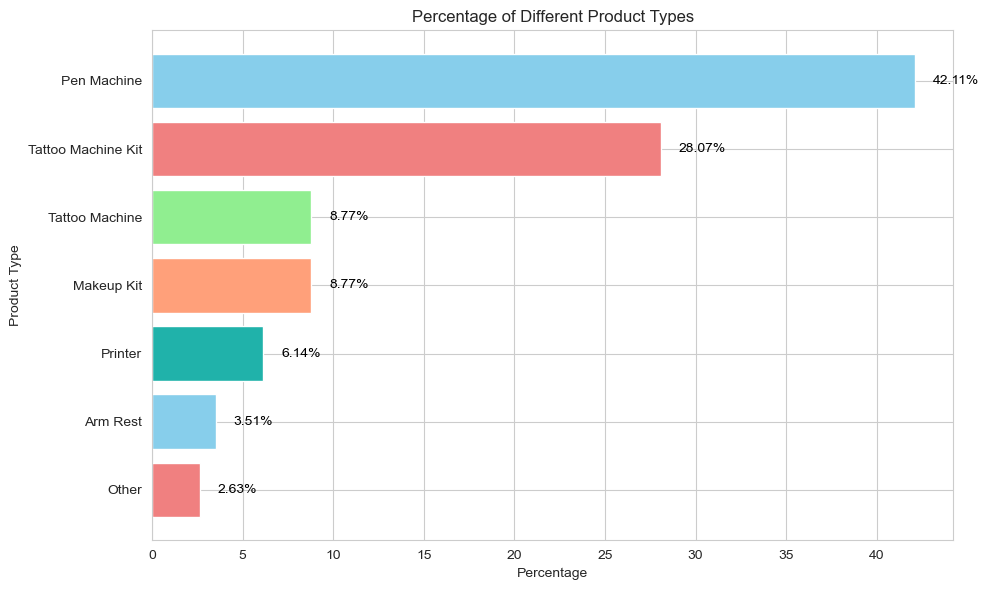

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Check for non-finite values in the 'percentage' column
non_finite = ~np.isfinite(result['percentage'])
if non_finite.any():
    print("Non-finite values found in the 'percentage' column.")
    print(result[non_finite])

# Drop rows with non-finite values in the 'percentage' column
result = result[np.isfinite(result['percentage'])]

# Visualize the results
plt.figure(figsize=(10, 6))
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightseagreen']

bars = plt.barh(result['product_type'], result['percentage'], color=colors)

plt.title("Percentage of Different Product Types")
plt.xlabel("Percentage")
plt.ylabel("Product Type")
plt.gca().invert_yaxis()

for index, value in enumerate(result['percentage']):
    plt.text(value + 1, index, f'{value:.2f}%', ha='left', va='center', color='black')

plt.tight_layout()
plt.show()

**Conclusion:**

The results obtained from the query indicating the percentages of different product types in the dataset provide valuable insights into the   
distribution of product types within the tattoo machine market. Here are some conclusions that can be drawn:

- **Dominance of Pen Machines:** Pen Machines constitute the most significant portion of the product types, comprising approximately 42.1% of the  
total products. This suggests that pen-style tattoo machines are prevalent or have higher availability compared to other types in the dataset.

- **Significant Presence of Tattoo Machine Kits:** Tattoo Machine Kits represent around 28.1% of the products. This indicates that there is a   substantial market for kits that may include various tattoo-related equipment or a combination of machines with accessories.

- **Relatively Lower Representation of Other Types:** The percentages of other types, such as Tattoo Machines, Makeup Kits, Printers, Arm Rests, and  
Other miscellaneous types, range from approximately 2.6% to 8.8%. This implies that these categories individually constitute smaller portions of the   overall product types in the dataset.

- **Potential Trends or Preferences:** The higher percentages for Pen Machines and Tattoo Machine Kits may suggest higher demand or popularity  
among consumers. Conversely, the lower percentages for categories like Arm Rests, Printers, and Others indicate relatively lower demand or market   presence for these specific types.

- **Market Insights for Business Strategies:** Businesses operating in the tattoo machine market can leverage this information to tailor their   strategies. For instance, focusing on Pen Machines and Tattoo Machine Kits might be advantageous due to their higher representation, potentially   attracting more customers or expanding product offerings in these categories.

- **Diversity in Offerings:** The variety of product types showcases the diverse offerings available within the tattoo machine market. This  
diversity allows for catering to different customer preferences, needs, and specialized requirements.

In summary, the analysis of product type percentages provides valuable market intelligence by highlighting the dominance of certain product types     
(such as Pen Machines and Tattoo Machine Kits) and the relatively lower representation of others. This information can guide businesses in making     
informed decisions about product development, marketing strategies, and inventory management within the tattoo machine market.

#### **4. Top 5 Pen Machines with images with the highest rating and the highest number of ratings**

**SQL Query:**

**Python Query:**

Top 5 Pen Machines with Highest Rating and Number of Ratings:
Product #49
Price: nan
Price: nan
Title: Bishop Rotary Shader Wand Pen-Style Rotary Tattoo Machine, Ergonomic, Ideal for Smooth, Realistic Black and Gray Shading, Matte Black with Grey Band
Rating: 5.0 out of 5 stars
Number of Ratings: 4


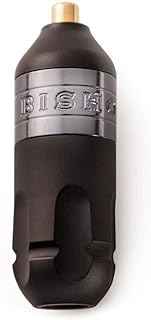

Product #34
Price: 367.0
Price: nan
Title: Tattoo Battery Pen Double Lithium Battery Wireless Tattoo Pen Secant Fog All-In-One Machine Direct Drive Motor Tattoo Machine,Green
Rating: 5.0 out of 5 stars
Number of Ratings: 3


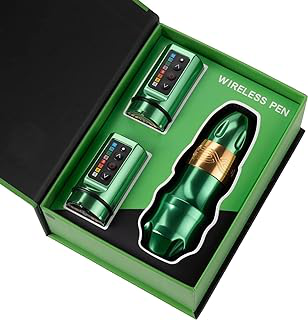

Product #37
Price: 974.99
Price: nan
Title: FK Irons - EXO Black Ops + 2 PowerBolts 3.2mm Stroke - Rotary Tattoo Machine Pen, RCA and Wireless Connection, Includes 2 PowerBolts Tattoo Battery Power Supply
Rating: 5.0 out of 5 stars
Number of Ratings: 3


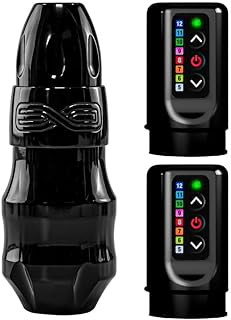

Product #63
Price: 299.99
Price: nan
Title: Peak Solice Modular Pen Tattoo Machine — Black
Rating: 5.0 out of 5 stars
Number of Ratings: 3


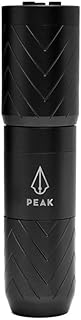

Product #73
Price: 699.99
Price: nan
Title: Axys Valhalla Rotary Pen Tattoo Machine — Pink
Rating: 5.0 out of 5 stars
Number of Ratings: 3


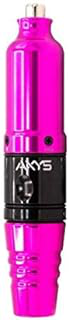

In [277]:
# Filter for 'Pen Machines'
pen_machines = tattoo_data[tattoo_data['product_type'] == 'Pen Machine']

# Sort the 'Pen Machines' by 'rating' and 'num_of_ratings' in descending order and select the top 5
top_pen_machines = pen_machines.sort_values(by=['rating', 'num_of_ratings'], ascending=[False, False]).head(5)

# Display the details of the top-rated 'Pen Machines'
print("Top 5 Pen Machines with Highest Rating and Number of Ratings:")
for idx, row in top_pen_machines.iterrows():
    print(f"Product #{idx + 1}")
    print(f"Price: {row['price']}")
    print(f"Price: {row['prime_price']}")
    print(f"Title: {row['title']}")
    print(f"Rating: {row['rating']}")
    print(f"Number of Ratings: {row['num_of_ratings']}")

    # Load and display the image
    img_path = f"{image_path}{row['link'].split('/')[-1]}"
    display(Image.open(img_path))

    print("=" * 30)

**Conclusion:**

From the results obtained for the query that sought the top 5 pen machines with the highest ratings and the highest number of ratings,   
several conclusions can be drawn:

- **Consistent High Ratings:** All the listed pen machines have received the highest possible rating of 5.0 out of 5 stars. This indicates a   
consistent level of customer satisfaction and high-quality performance across these products. Customers who have reviewed these pen machines   
have generally provided very positive feedback.

- **Limited Number of Ratings:** Each of the listed pen machines has a relatively low number of ratings, ranging from 3 to 4 ratings. Despite the   
high ratings, the low number of ratings suggests that these products may not have been reviewed or purchased by a large number of customers.   
It's important to note that the overall satisfaction might not be representative of a broader customer base.

- **Price Variation:** The prices of the listed pen machines vary, ranging from mid-range to higher-end prices. This variation might indicate that   
customers have different budget preferences when it comes to purchasing pen-style tattoo machines, and they are willing to invest in products   
across a range of prices.

- **Product Descriptions:** The product titles provide insights into the features and specifications of these pen machines. For instance,  
descriptions mention attributes such as ergonomic design, wireless capabilities, different strokes, and specific colors or designs.

- **Preference for Pen-Style Machines:** The focus of this query on pen-style rotary tattoo machines suggests that customers might have a preference   
for this particular type of machine, possibly due to factors like ease of use, precision, or other functionalities associated with pen-style devices.

In summary, the query results indicate a selection of pen-style tattoo machines with consistently high ratings and varying prices. While these   
machines have received positive feedback, the limited number of ratings suggests a need for broader customer participation to establish more   
comprehensive insights into customer satisfaction and product performance across a wider customer base.

#### **5. Top 10 highest priced and highest rated Tattoo products**

**SQL Query:**

This SQL query selects all columns from the 'best_sellers' table, filtering out rows where the 'price' column is 'null', then sorts the results by 'price' in descending order followed by 'rating' in descending order. Finally, it limits the result set to the top 10 rows.

**Python Query:**

Top 10 Highest Priced and Highest Rated Products:
Product #104
Title: InkJecta Flite X1 Cordless Tattoo Machine - Stealth
Rating: 5.0 out of 5 stars
Price: 1049.99


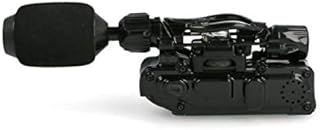

Product #30
Title: Cheyenne Sol Nova Unlimited Cordless Tattoo Machine — 4.0mm Black
Rating: 4.2 out of 5 stars
Price: 998.99


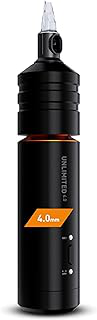

Product #37
Title: FK Irons - EXO Black Ops + 2 PowerBolts 3.2mm Stroke - Rotary Tattoo Machine Pen, RCA and Wireless Connection, Includes 2 PowerBolts Tattoo Battery Power Supply
Rating: 5.0 out of 5 stars
Price: 974.99


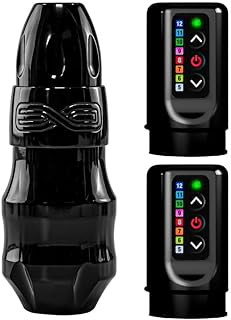

Product #31
Title: FK Irons - EXO Shadow Camo + 2 PowerBolts 4.0mm Stroke - Rotary Tattoo Machine Pen with RCA Wired & Wireless Connection, Includes 2 PowerBolts Tattoo Battery Power Supply
Rating: 4.2 out of 5 stars
Price: 974.99


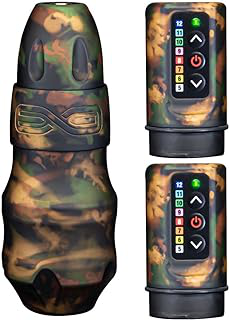

Product #33
Title: Bishop Rotary Liner Wand Tattoo Machine Pen-Style for Tattooing, Professional Lightweight Portable Aluminum
Rating: 4.0 out of 5 stars
Price: 799.99


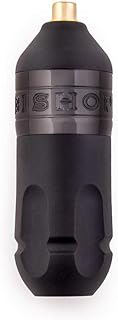

Product #61
Title: Microbeau - Flux S Wireless Tattoo Machine with 1 PowerBolt - Pink Bubblegum - Wireless Tattoo Machine Pen for Microblading Lips, Eyeliner & More
Rating: 4.0 out of 5 stars
Price: 799.99


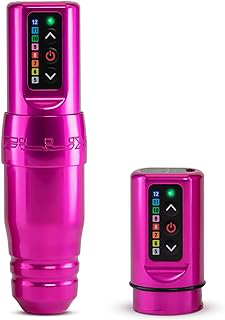

Product #32
Title: Vlad Blad Avenger 2 Pro Hybrid Rotary Tattoo Machine
Rating: 4.0 out of 5 stars
Price: 789.99


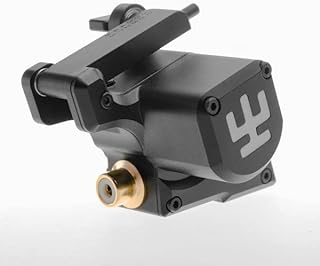

Product #21
Title: FK Irons Spektra Flux Wireless Tattoo Machine with 1 PowerBolt, Chromium - USB Rechargeable Tattoo Pen Machine, Up to 10 Hours of Battery Life - Lightweight Design, Detachable Battery, 4mm Stroke
Rating: 4.6 out of 5 stars
Price: 749.99


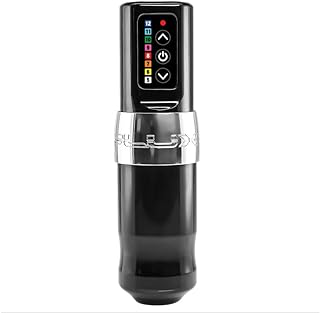

Product #73
Title: Axys Valhalla Rotary Pen Tattoo Machine — Pink
Rating: 5.0 out of 5 stars
Price: 699.99


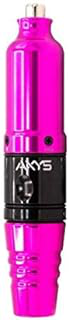

Product #41
Title: Microbeau - Spektra Xion S Rotary Tattoo Machine for Makeup Application - Gunmetal - Pen-style Cosmetic Tattoo Machine with Adjustable Stroke Length
Rating: 4.4 out of 5 stars
Price: 674.99


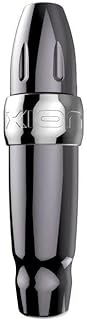

In [278]:
import pandas as pd
from PIL import Image
from IPython.display import display

image_path = "C:/Users/User/Documents/DataAnalyst/Webscrape/CombinedImages/"  # Your image path

# Sort the DataFrame by 'price' and 'rating' columns in descending order and select the top 10
top_products = tattoo_data.sort_values(by=['price', 'rating'], ascending=[False, False]).head(10)

# Display details of the top-rated products with images
print("Top 10 Highest Priced and Highest Rated Products:")
for idx, row in top_products.iterrows():
    print(f"Product #{idx + 1}")
    print(f"Title: {row['title']}")
    print(f"Rating: {row['rating']}")
    print(f"Price: {row['price']}")

    # Load and display the image
    img_path = f"{image_path}{row['link'].split('/')[-1]}"  # Adjust path if needed
    display(Image.open(img_path))

    print("=" * 30)

**Conclusion:**

From the results obtained for the query searching for the top 10 highest priced and highest rated tattoo products, several conclusions can be drawn:  

- **Price Variation:** The listed tattoo machines exhibit a diverse range of prices, with the cost varying significantly from $674.99 to $1049.99. This   
price disparity suggests that there's a wide spectrum of pricing in the tattoo machine market, catering to different budget preferences among customers.

- **High Ratings:** Most of the listed products received high ratings, with ratings mostly falling within the range of 4.0 to 5.0 out of 5 stars. The   
consistent high ratings indicate that these tattoo machines have generally satisfied customers and met their expectations regarding performance,   
quality, and usability.

- **Brand Diversity:** Various brands are represented among the listed products, including FK Irons, Bishop Rotary, Cheyenne, Microbeau, InkJecta,   
Vlad Blad, and Axys. This diversity suggests that customers have preferences across different brands, potentially based on factors like reputation,   
features offered, and customer service.

- **Features and Specifications:** The product titles provide insights into the features, capabilities, and designs of these tattoo machines.   
Specific details mentioned include cordless functionality, wireless connections, different stroke lengths, lightweight designs, rechargeable batteries,   
and specialized applications like makeup tattooing.

- **Popularity of Cordless/Wireless Machines:** Several products, such as cordless or wireless tattoo machines, are included in the list. This could 
indicate a rising trend or customer preference for portable and convenient tattoo machines without cords, offering greater flexibility and ease of use.  

- **Price vs. Rating:** While higher-priced tattoo machines do not consistently correlate with higher ratings, some lower-priced products also received   
high ratings. This suggests that customers consider factors beyond just price when evaluating and rating these tattoo machines.

In summary, the query results showcase a diverse set of tattoo machines with varying prices and features. High ratings across most products indicate   
customer satisfaction, while the price differences and brand diversity highlight the choices available in the market catering to different customer  
preferences and needs

#### **5. Correlation coefficient between 'price' and 'rating'**

**SQL Query:**

To calculate the correlation between 'price' and 'rating', we'll need to preprocess the 'rating' column to extract the numerical values before computing the correlation. 

The 'rating' column contains strings in the format "X out of 5 stars" (where X is a numeric value), we can use string manipulation functions in SQL to  extract the numeric part and convert it to a numeric type.

This SQL query utilizes SUBSTRING and REPLACE functions to extract the numeric part from the 'rating' column and replace commas (if any) with periods   to handle decimal values, assuming that the rating starts with a numeric value followed by 'out of 5 stars'.

**Python Query:**

In [20]:
import pandas as pd

# Extract numeric ratings from the 'rating' column
numeric_ratings = tattoo_data['rating'].str.extract(r'^(\d+\.\d+|\d+)', expand=False).astype(float)

# Calculate correlation between 'price' and numeric ratings
price_ratings_correlation = tattoo_data['price'].astype(float).corr(numeric_ratings)

print(f"Price vs. Ratings Correlation: {price_ratings_correlation}")

Price vs. Ratings Correlation: -0.06734854296389774


**Matplotlib Visualization:**

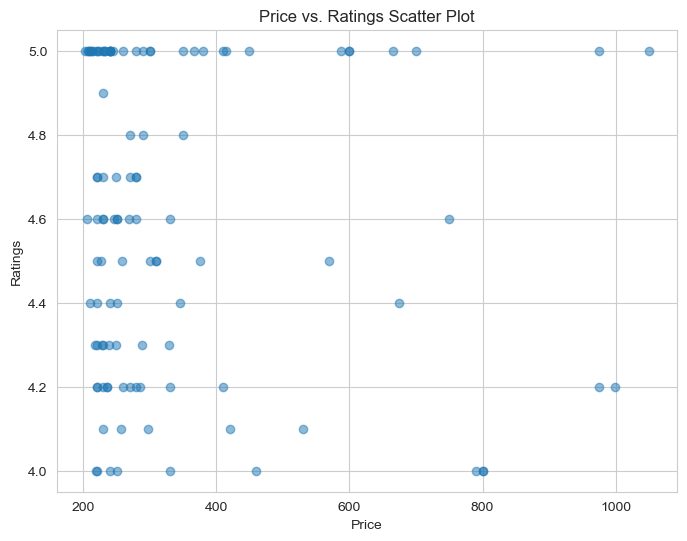

In [196]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'tattoo_data' is your DataFrame containing columns 'price' and 'rating'

# Extract numeric ratings from the 'rating' column
numeric_ratings = tattoo_data['rating'].str.extract(r'^(\d+\.\d+|\d+)', expand=False).astype(float)

# Convert price and ratings to float
tattoo_data['price'] = tattoo_data['price'].astype(float)
tattoo_data['rating'] = numeric_ratings

# Plotting scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(tattoo_data['price'], tattoo_data['rating'], alpha=0.5)
plt.title('Price vs. Ratings Scatter Plot')
plt.xlabel('Price')
plt.ylabel('Ratings')
plt.grid(True)
plt.show()

**Conclusion:**

A correlation value of approximately -0.067 suggests a weak negative linear relationship between 'Price' and 'Ratings'.

The negative sign (-) indicates that as the 'Price' increases, there is a slight tendency for the 'Ratings' to decrease slightly.   
However, the correlation is very weak. The value being close to zero (near to 0) suggests that there's almost no linear relationship between   
'Price' and 'Ratings'. In other words, changes in the price of the products do not significantly impact the ratings given by customers.  
    
It's important to note that correlation does not imply causation. Therefore, while there may be a weak negative correlation between 'Price' and   
'Ratings', other factors not included in this analysis might have a stronger influence on the ratings given by customers.

#### **6. Distribution of products from top brands**

This query helps to understand the distribution of products from different brands and how their products perform in terms of ratings, pricing, and popularity.

**SQL Query:**

The SQL code provided is performing the following tasks:

**A. Brand Categorization:** It categorizes brands based on their presence within the 'title' column using various keywords associated with     
different brands, assigning them specific labels such as 'Bishop', 'Cheyenne', 'FK Irons', and others.

**B. Aggregation and Metrics:** It aggregates the data based on these categorized brands, computing several metrics:

- Product Types: Lists the various product types associated with each brand.
- Total Products: Counts the total number of products associated with each brand.
- Average Rating: Calculates the average rating (extracted from the 'rating' column) for products related to each brand.
- Average Price: Computes the average price (extracted from the 'price' column) of products for each brand.
- Average Number of Ratings: Finds the average number of ratings for products under each brand.

**C. Sorting and Presentation:** Finally, it sorts the results in descending order based on the total number of products attributed to each   
brand, providing insights into which brands are most prominent within the market based on the specified criteria and metrics.

**Python Query:**

The Python code conducts the following:

**A. Data Aggregation and Metrics Calculation:** Iterates through specified brands in the dataset and filters data for each brand. For every brand:

- Extracts unique product types associated with the brand.
- Computes the average number of ratings ('num_of_ratings') for products attributed to the brand.
- Derives the average rating based on the 'rating' column by converting its values to a numeric format and calculating the mean.
- Calculates the average price from the 'price' column by converting values to a numeric format and finding the mean.

**B. Data Integration:** Collects the calculated metrics into a dictionary for each brand.

**C. DataFrame Creation:** Constructs a DataFrame from the collected brand metrics, including 'brand', 'product_type', 'avg_num_of_ratings',   
'avg_rating', 'avg_price', and 'total_products' columns.

**D. Sorting and Formatting:** Sorts the DataFrame by the 'total_products' column in descending order to identify dominant brands in the market   
based on product volume. Additionally, it rounds specific columns (avg_num_of_ratings, avg_rating, avg_price) to two decimal places for better   
readability.

**Printing Results:** Displays the DataFrame containing brand metrics, providing insights into the market dominance of various brands alongside   
their respective product types and averaged performance metrics.

In [90]:
import pandas as pd
import re

brands_to_find = [
    'Bishop', 'Cheyenne', 'FK Irons', 'Mast', 'Ambition',
    'Hawink', 'Peak', 'InkJecta', 'Vlad', 'Microbeau', 'Axys Valhalla'
]

# Function to extract numeric ratings from the 'rating' column
def extract_numeric_rating(text):
    match = re.search(r'^(\d+(\.\d+)?)', str(text))
    return float(match.group()) if match else 0

# Extract numeric ratings and add a new 'numeric_rating' column to the DataFrame
tattoo_data['numeric_rating'] = tattoo_data['rating'].apply(extract_numeric_rating)

# Create a dictionary to store brand-wise data
brand_data = {}
for brand in brands_to_find:
    brand_data[brand] = {
        'product_type': ', '.join(tattoo_data[tattoo_data['title'].str.contains(brand, case=False)]['product_type'].unique()),
        'total_products': tattoo_data[tattoo_data['title'].str.contains(brand, case=False)].shape[0],
        'avg_rating': round(tattoo_data[tattoo_data['title'].str.contains(brand, case=False)]['numeric_rating'].mean(), 2),
        'avg_price': round(tattoo_data[tattoo_data['title'].str.contains(brand, case=False)]['price'].mean(), 2),
        'avg_num_of_ratings': round(tattoo_data[tattoo_data['title'].str.contains(brand, case=False)]['num_of_ratings'].mean(), 2)
    }

# Create a DataFrame from the dictionary
brand_info_df = pd.DataFrame(brand_data).T.rename_axis('brand').reset_index()

# Sort the DataFrame by 'total_products' column in descending order
brand_info_df = brand_info_df.sort_values(by='total_products', ascending=False)

print(brand_info_df)


            brand                                 product_type total_products  \
4        Ambition  Tattoo Machine Kit, Pen Machine, Makeup Kit             10   
3            Mast              Tattoo Machine Kit, Pen Machine              8   
1        Cheyenne                  Pen Machine, Tattoo Machine              6   
2        FK Irons                                  Pen Machine              5   
6            Peak                                  Pen Machine              5   
0          Bishop                                  Pen Machine              2   
7        InkJecta                               Tattoo Machine              2   
8            Vlad                               Tattoo Machine              2   
9       Microbeau                                  Pen Machine              2   
5          Hawink                           Tattoo Machine Kit              1   
10  Axys Valhalla                                  Pen Machine              1   

   avg_rating avg_price avg

**Matplotlib Visualization:**

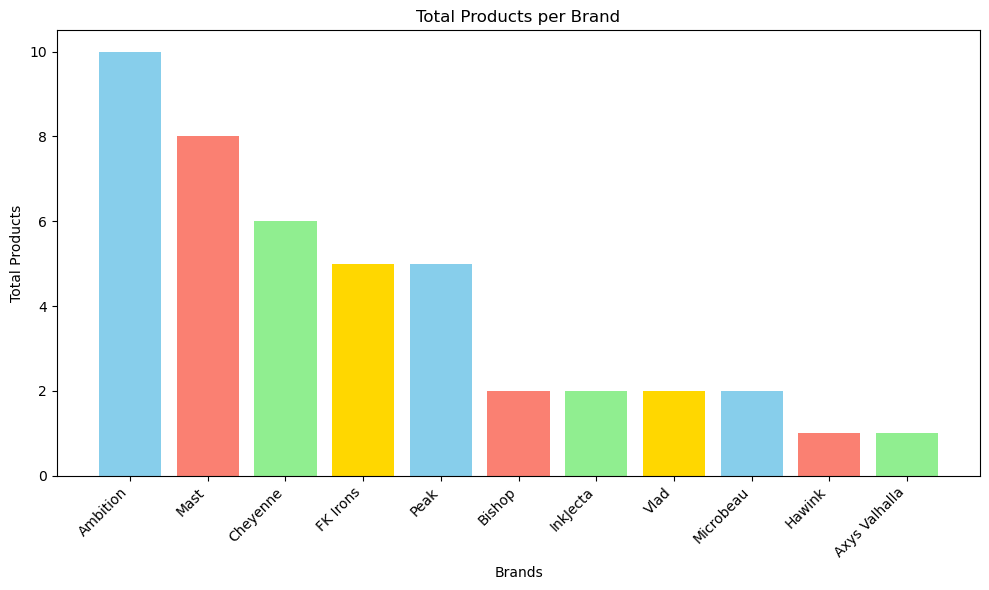

In [91]:
import matplotlib.pyplot as plt

# Assigning colors to each brand
colors = ['skyblue', 'salmon', 'lightgreen', 'gold']  # Add more colors as needed

# Using brand_info_df from the previous code
plt.figure(figsize=(10, 6))
bars = plt.bar(brand_info_df['brand'], brand_info_df['total_products'], color=colors)

# Adding labels and title
plt.xlabel('Brands')
plt.ylabel('Total Products')
plt.title('Total Products per Brand')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


In [84]:
print(brand_info_df.columns)


Index(['link', 'title', 'rating', 'price', 'prime_price', 'num_of_ratings',
       'product_type'],
      dtype='object')


**Conclusion:**

From the provided metrics for different brands in the tattoo machine industry, here are some conclusions we can draw:

**A. Product Type Distribution:**

- Ambition seems to offer a versatile range of products, including Tattoo Machine Kit, Pen Machine, and Makeup Kit.
- Mast also provides a diverse range, including Tattoo Machine Kit and Pen Machine.
- Cheyenne mainly focuses on Pen Machine and Tattoo Machine.
- FK Irons concentrates on Pen Machine.
- Peak mainly offers Pen Machines with a relatively lower number of products.
- Bishop has a moderate number of products, mainly in Pen Machine.
- InkJecta, Vlad, Microbeau, Hawink, and Axys Valhalla have fewer products in the market compared to the others, with a variety of product   
types among them.
    
**B. Average Number of Ratings and Ratings:**

- Ambition and Hawink have relatively higher average numbers of ratings (119.40 and 117.00), suggesting higher popularity or usage compared   
to other brands.
- InkJecta, Vlad, Microbeau, and Axys Valhalla have fewer ratings, indicating that they might be newer brands in the market or might have a   
more niche audience.
- Peak stands out with a very high average rating of 4.92, followed closely by Cheyenne at 4.75, indicating high customer satisfaction with    
their products.
- InkJecta has the highest average rating of 5.00 but with a very limited number of ratings, indicating potential quality but lower user   
feedback volume.
    
**C. Average Price:**
    
- InkJecta and FK Irons have relatively higher average prices compared to other brands, suggesting that their products might be more high-end or premium.
- Peak has a moderately high average price despite fewer products.
        
**D. Total Products:**
        
- Ambition and Mast have the highest total product counts, indicating a wider range of offerings and potentially larger market presence.
- Cheyenne and FK Irons follow with a moderate number of products.
- Other brands like InkJecta, Vlad, Microbeau, Hawink, and Axys Valhalla have fewer products in the market.

**E. Overall:**

- Ambition, Mast, Cheyenne, and FK Irons seem to be well-established brands with a decent variety of products and moderate-to-high user engagement.
- Peak stands out with a smaller product range but high ratings and moderately high prices.
- Brands like InkJecta, Vlad, Microbeau, Hawink, and Axys Valhalla might be newer in the market or cater to a more specific niche audience, evident   
from their lower product count and ratings.

These conclusions provide an overview of brand performances and market presence based on the given metrics. Understanding these metrics can help   
in strategic decision-making, identifying areas for improvement, and catering better to customer needs within the tattoo machine industry.

#### **7. Distribution of ratings**

Understanding if the majority of products have high ratings or if there's a broader range of ratings across the dataset.

**SQL Query:**

The provided SQL code aims to analyze the distribution of ratings within the best_sellers table. It achieves this by performing several   
statistical calculations:

- Minimum Rating: It identifies the lowest rating among all products listed in the table.

- Maximum Rating: It determines the highest rating among all products listed in the table.

- Average Rating: It calculates the average (mean) rating of all products.

- Median Rating: It computes the median rating, which is the middle value separating the higher half from the lower half of ratings, after   
arranging them in ascending order.

- Standard Deviation of Ratings: It measures the amount of variation or dispersion of ratings from the mean rating.

The SQL code achieves this by extracting the numeric part from the 'X out of 5 stars' format present in the 'rating' column of the best_sellers   
table. Each calculation serves to provide insights into how ratings are distributed across the products, including the range, centrality, and   
variability of ratings within the dataset.

**Python Query:**

The provided Python code snippet is performing the following actions to analyze the distribution of ratings within a dataset:

**A. Data Preprocessing:**

- It defines a function extract_numeric_rating that extracts numeric ratings from a text-based 'rating' column using regular expressions.   
- The function creates a new column named 'numeric_rating' in the DataFrame 'tattoo_data' by applying the extract_numeric_rating function to   
the 'rating' column. This new column contains the numeric values extracted from the 'rating' column.

**B. Statistical Analysis:**

It calculates various statistical metrics related to the distribution of ratings within the dataset:

- Minimum Rating: Finds the minimum value of the 'numeric_rating' column, representing the lowest rating in the dataset.
- Maximum Rating: Determines the maximum value of the 'numeric_rating' column, representing the highest rating in the dataset.
- Average Rating: Calculates the mean (average) of the 'numeric_rating' column, providing an overall average rating of the products in the dataset.  
- Median Rating: Computes the median value of the 'numeric_rating' column, representing the middle value when all ratings are arranged in   
ascending order.
- Standard Deviation of Ratings: Determines the standard deviation of the 'numeric_rating' column, measuring the amount of variation or   
dispersion in the ratings.

**C. Weighted Average Calculation:**

- It calculates a weighted average rating, considering the number of ratings ('num_of_ratings') each product has received. This weighted   
average accounts for the influence of the number of ratings on the overall average rating, giving more weight to products with a higher   
number of ratings.

In summary, this code snippet prepares the data by extracting numeric ratings and then computes various statistical metrics to provide   
insights into the distribution, range, and characteristics of the ratings within the dataset.thin the dataset.

In [92]:
import pandas as pd
import re

# Function to extract numeric ratings from the 'rating' column
def extract_numeric_rating(text):
    match = re.search(r'(\d+(\.\d+)?)', str(text))
    return float(match.group()) if match else 0

# Extract numeric ratings and add a new 'numeric_rating' column to the DataFrame
tattoo_data['numeric_rating'] = tattoo_data['rating'].apply(extract_numeric_rating)

# Calculate weighted average of ratings considering 'num_of_ratings'
weighted_avg_rating = (tattoo_data['numeric_rating'] * tattoo_data['num_of_ratings']).sum() / tattoo_data['num_of_ratings'].sum()

# Calculate and print statistical metrics for rating distribution considering 'num_of_ratings'
min_rating = tattoo_data['numeric_rating'].min()
max_rating = tattoo_data['numeric_rating'].max()
avg_rating = weighted_avg_rating  # Using the weighted average here
median_rating = tattoo_data['numeric_rating'].median()
std_dev_rating = tattoo_data['numeric_rating'].std()

print(f"Minimum Rating: {min_rating}")
print(f"Maximum Rating: {max_rating}")
print(f"Average Rating: {avg_rating}")
print(f"Median Rating: {median_rating}")
print(f"Standard Deviation of Ratings: {std_dev_rating}")


Minimum Rating: 4.0
Maximum Rating: 5.0
Average Rating: 4.4383701188455005
Median Rating: 4.6
Standard Deviation of Ratings: 0.3596259852221629


**Matplotlib Visualization:**

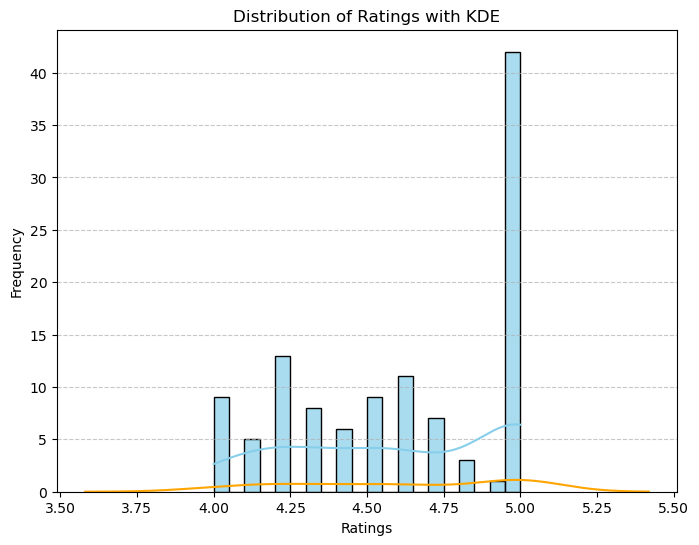

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'tattoo_data' is your DataFrame
plt.figure(figsize=(8, 6))
sns.histplot(data=tattoo_data, x='numeric_rating', bins=20, kde=True, color='skyblue', alpha=0.7)
sns.kdeplot(data=tattoo_data['numeric_rating'], color='orange')  # KDE plot for density estimation
plt.title('Distribution of Ratings with KDE')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Conclusion:**

From the provided statistical metrics and the previously generated visualization, several conclusions can be drawn about the distribution of ratings:

**A. Rating Range:** The ratings range from a minimum of 4.0 to a maximum of 5.0, indicating a relatively narrow range of ratings. This suggests   
that the majority of products in the dataset have high ratings, as all ratings fall within the 4.0 to 5.0 range.

**B. Central Tendency:** The average (weighted) rating is approximately 4.44, while the median rating is 4.6. This indicates that the majority of   
ratings are concentrated toward the higher end of the scale (between 4.0 and 5.0). The median being higher than the average suggests that a few   
lower ratings might exist but are less frequent.

**C. Dispersion:** The standard deviation of ratings is approximately 0.36, indicating relatively low variability or dispersion around the mean   
rating. It further supports the idea that ratings tend to cluster around the higher values.

**D. Dominance of High Ratings:** Considering the narrow range of ratings, the higher average and median ratings, and the lower variability, it   
seems that the majority of products in the dataset have received high ratings closer to the upper limit of the rating scale   
(around 4.5 to 5.0 stars). This suggests a trend where most products are highly rated, potentially reflecting overall customer satisfaction   
with these products.

These conclusions collectively indicate a dataset with a strong positive skew toward higher ratings, implying a prevalent trend of positive   
evaluations for the products represented in the dataset.